In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import warnings
import datetime
warnings.simplefilter(action="ignore", category=np.VisibleDeprecationWarning)
warnings.simplefilter(action="ignore", category= UserWarning)
warnings.simplefilter(action="ignore", category= pd.core.common.SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)


In [37]:
df = pd.read_csv('/content/drive/MyDrive/kaggle_datasets/pokemon.csv')
df.head(20)

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.00,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.00,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.00,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.00,0.5,0.5,0.25,1.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.50,2.0,1.0,0.50,0.5,1.00,1.0,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
5,5,5,Charmeleon,Glutexo,リザード (Lizardo),1,Normal,Flame Pokémon,1,Fire,NaN,1.1,19.0,2,Blaze,NaN,Solar Power,405.0,58.0,64.0,58.0,80.0,65.0,80.0,45.0,70.0,142.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.50,2.0,1.0,0.50,0.5,1.00,1.0,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
6,6,6,Charizard,Glurak,リザードン (Lizardon),1,Normal,Flame Pokémon,2,Fire,Flying,1.7,90.5,2,Blaze,NaN,Solar Power,534.0,78.0,84.0,78.0,109.0,85.0,100.0,45.0,70.0,240.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.50,2.0,2.0,0.25,1.0,0.50,1.0,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
7,7,6,Mega Charizard X,Glurak,リザードン (Lizardon),1,Normal,Flame Pokémon,2,Fire,Dragon,1.7,110.5,1,Tough Claws,NaN,NaN,634.0,78.0,130.0,111.0,130.0,85.0,100.0,45.0,70.0,285.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.25,1.0,0.5,0.25,1.0,1.00,1.0,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0
8,8,6,Mega Charizard Y,Glurak,リザードン (Lizardon),1,Normal,Flame Pokémon,2,Fire,Flying,1.7,100.5,1,Drought,NaN,NaN,634.0,78.0,104.0,78.0,159.0,115.0,100.0,45.0,70.0,285.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.50,2.0,2.0,0.25,1.0,0.50,1.0,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
9,9,7,Squirtle,Schiggy,ゼニガメ (Zenigame),1,Normal,Tiny Turtle Pokémon,1,Water,NaN,0.5,9.0,2,Torrent,NaN,Rain Dish,314.0,44.0,48.0,65.0,50.0,64.0,43.0,45.0,70.0,63.0,Medium Slow,2,Monster,Water 1,87.5,20.0,1.0,0.50,0.5,2.0,2.00,0.5,1.00,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0


In [38]:
df = df.drop('Unnamed: 0',axis=1)
pd.set_option('display.max_columns', None)
df.head()

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


#Finding Null values

In [39]:
null_filter = df.isna().sum()
missing_values = null_filter.loc[df.isna().sum() != 0].to_frame().copy()
missing_values

,0
german_name,90
japanese_name,90
type_2,486
weight_kg,1
ability_1,3
ability_2,515
ability_hidden,218
catch_rate,104
base_friendship,104
base_experience,104


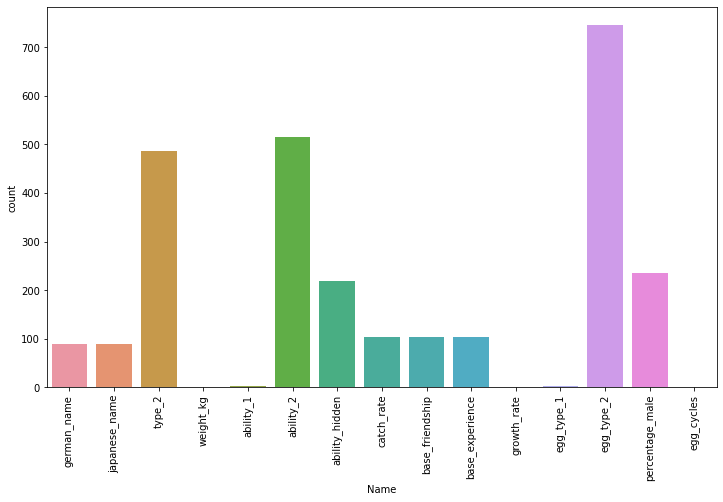

In [40]:
missing_values.columns = ['count']
missing_values['Name'] = missing_values.index
missing_values.reset_index(drop=True, inplace=True)
missing_values
plt.figure(figsize=(12,7))
sns.barplot(x='Name', y='count', data=missing_values);
plt.xticks(rotation=90);

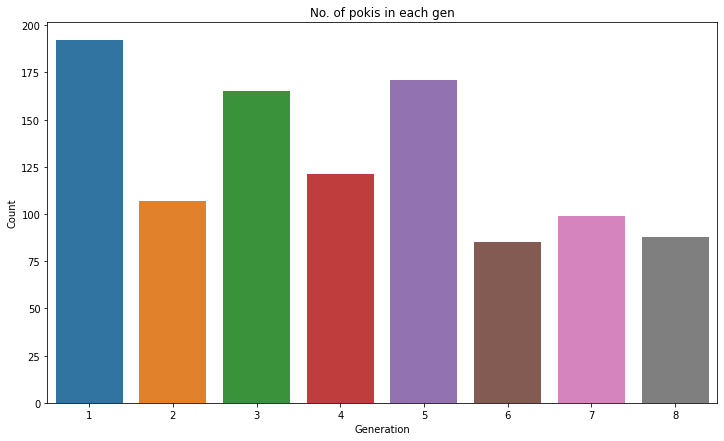

In [41]:
# No. of pokemon in each gen
plt.figure(figsize=(12,7))
ax = sns.countplot(data=df,x='generation')
ax.set(xlabel='Generation',ylabel='Count',title='No. of pokis in each gen');

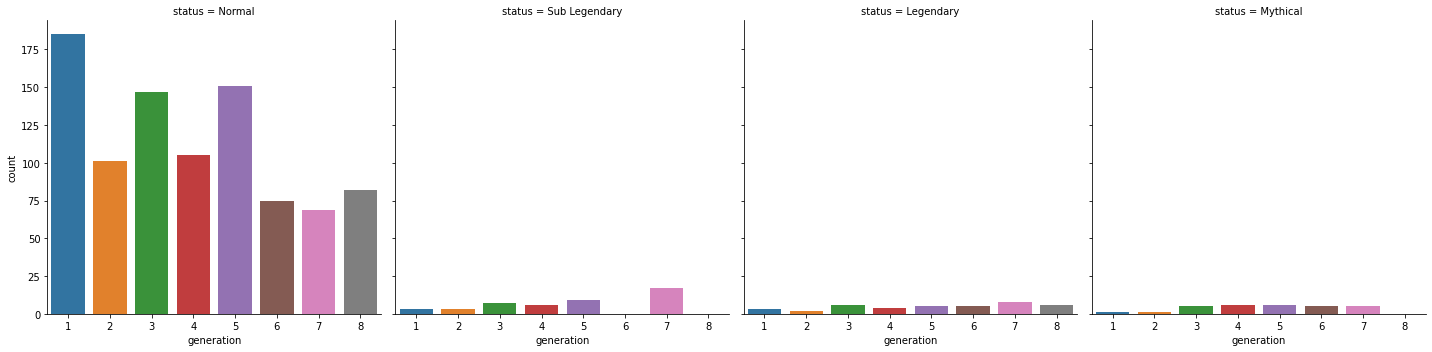

In [42]:
sns.catplot(data=df,x='generation',col='status',kind='count');

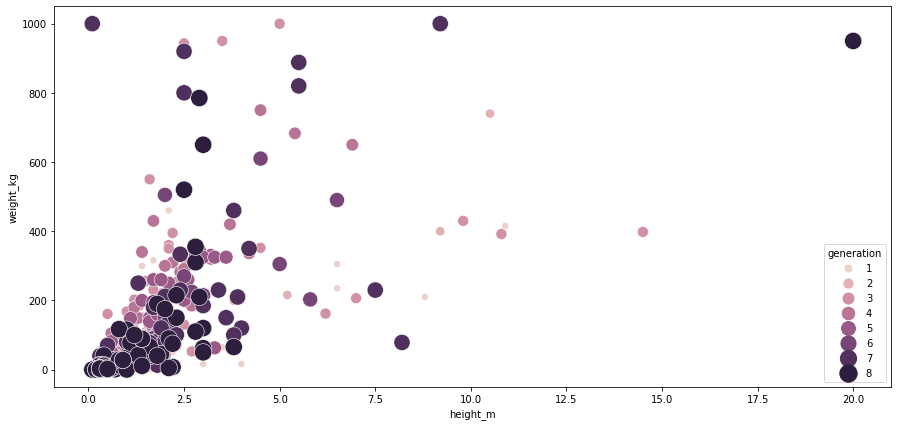

In [43]:
# Height vs weight graph
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,x='height_m',y='weight_kg',hue='generation',size='generation',sizes=(50,300),legend='full');

# Legendry pokemon prediction

In [44]:
# Dropping all irrelevant columns
df.drop(columns = [x for x in df.columns if 'against' in x],inplace=True)
df.drop(columns = ['german_name','japanese_name','base_friendship','ability_1','ability_2','ability_hidden',"abilities_number",'base_experience','egg_type_number','egg_type_1','egg_type_2','percentage_male','egg_cycles',"species","type_number"],inplace=True)
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate
0,1,Bulbasaur,1,Normal,Grass,Poison,0.7,6.9,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,Medium Slow
1,2,Ivysaur,1,Normal,Grass,Poison,1.0,13.0,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,Medium Slow
2,3,Venusaur,1,Normal,Grass,Poison,2.0,100.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,Medium Slow
3,3,Mega Venusaur,1,Normal,Grass,Poison,2.4,155.5,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,Medium Slow
4,4,Charmander,1,Normal,Fire,NaN,0.6,8.5,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,Medium Slow


In [45]:
df['status'] = df['status'].apply(lambda x : 'Legendary' if x == 'Sub Legendary' else x)
df['status'].value_counts()


Normal       915
Legendary     84
Mythical      29
Name: status, dtype: int64

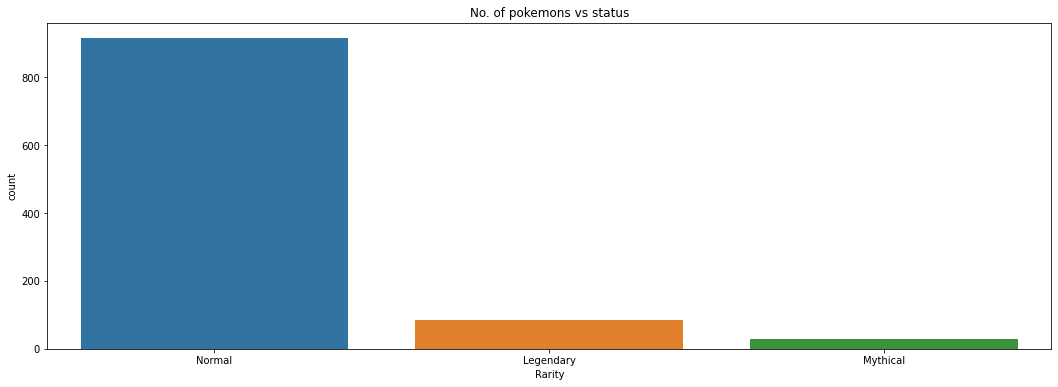

In [46]:
plt.figure(figsize=(18,6))
ax = sns.barplot(df['status'].value_counts().index,df['status'].value_counts())
ax.set(xlabel='Rarity',ylabel='count',title='No. of pokemons vs status')
plt.show()


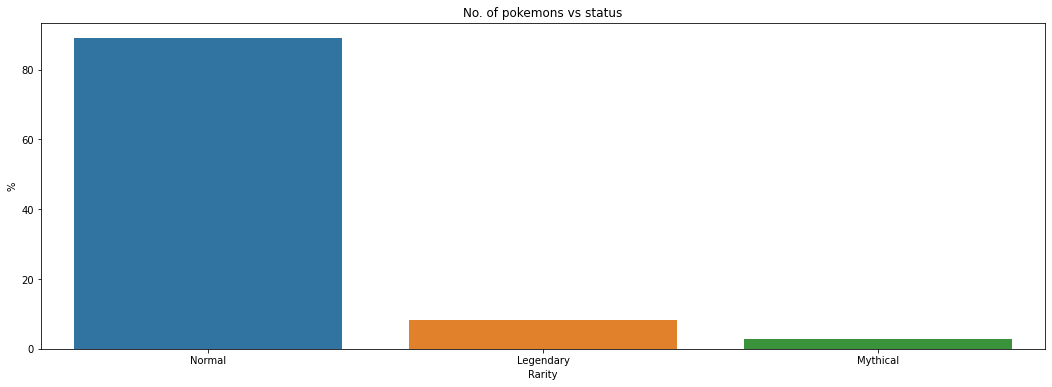

In [47]:
# In percentage
plt.figure(figsize=(18,6))
ax = sns.barplot(df['status'].value_counts().index,df['status'].value_counts(normalize=True)*100)
ax.set(xlabel='Rarity',ylabel='%',title='No. of pokemons vs status')
plt.show()


# Growth Rate of Pokemons

In [48]:
df_growth_rate = (df.groupby('status')['growth_rate'].value_counts(normalize=True)*100).round(2).rename('Percentages').to_frame()
df_growth_rate

Percentages
status    growth_rate             
Legendary Slow              100.00
Mythical  Slow               86.21
          Medium Slow        13.79
Normal    Medium Fast        47.26
          Medium Slow        26.37
          Slow               14.55
          Fast                7.44
          Erratic             2.84
          Fluctuating         1.53

In [49]:
fig = px.bar(data_frame=df_growth_rate.reset_index(),x='status',y='Percentages',color='growth_rate',title='Growth Dist Of Pokis')
fig.update_traces(width = 0.2)
fig.show()

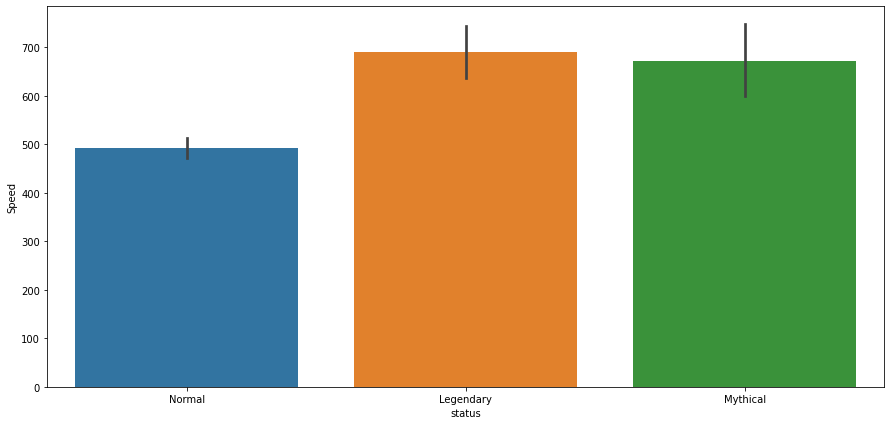

In [50]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='status',y=df['speed'].index)
plt.ylabel('Speed')
plt.show()

In [51]:
df.isnull().sum()

pokedex_number      0
name                0
generation          0
status              0
type_1              0
type_2            486
height_m            0
weight_kg           1
total_points        0
hp                  0
attack              0
defense             0
sp_attack           0
sp_defense          0
speed               0
catch_rate        104
growth_rate         1
dtype: int64

In [92]:
def pre_processing(data):
  data = data.copy()
  data = data.drop(['name','type_2'], axis = 1) # Dropping columns
  fillna_cols = ['weight_kg','catch_rate']
  for col in fillna_cols:
    data[col] = data[col].fillna(df[col].median()) # Filling Nan with medians
  cat_cols = data.dtypes[data.dtypes == 'object'].index.values.tolist()
  for col in cat_cols:
    if data[col].dtype == 'object':
      data[col] = data[col].astype('category') # Converting object columns to category
  
  data['status'] = data['status'].apply(lambda x : 'Legendary' if x == 'Mythical' else x) # Converting Mythical to Legendary
  data = data.dropna() # Dropping remaining null values
  data = data.reset_index()
  # One Hot Encoding
  one_hot_cols = ['type_1','growth_rate']
  for col in one_hot_cols:
    dummies = pd.get_dummies(data[col],prefix = col)
    data = pd.concat([data, dummies], axis = 1)
    data = data.drop(col, axis = 1)
  data = data.drop('index', axis = 1)
  # Converting status column to int

  data['status'] = data['status'].replace({'Normal' : 0 , 'Legendary' : 1})
  # Splitting data
  X = data.drop('status', axis = 1)
  Y = data['status']
  # Training Data
  x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size = 0.30, shuffle = True, random_state = 1)

  # Scaling Data
  scaler = StandardScaler()
  scaler.fit(x_train)
  x_train = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns, index = x_train.index)
  x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns, index = x_test.index)

  return x_train, x_test, y_train,y_test
  

In [93]:
x_train, x_test, y_train,y_test = pre_processing(df)

In [94]:
x_train.head()

,pokedex_number,generation,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,type_1_Bug,type_1_Dark,type_1_Dragon,type_1_Electric,type_1_Fairy,type_1_Fighting,type_1_Fire,type_1_Flying,type_1_Ghost,type_1_Grass,type_1_Ground,type_1_Ice,type_1_Normal,type_1_Poison,type_1_Psychic,type_1_Rock,type_1_Steel,type_1_Water,growth_rate_Erratic,growth_rate_Fast,growth_rate_Fluctuating,growth_rate_Medium Fast,growth_rate_Medium Slow,growth_rate_Slow
598,0.273357,0.448491,-0.132202,-0.433623,-0.569666,-0.199133,-0.000429,-0.321473,-1.137053,-0.249047,-0.306476,0.419247,-0.270636,-0.212423,-0.197671,-0.236394,-0.141019,-0.193836,-0.249259,-0.099223,-0.201444,-0.299215,-0.212423,-0.181916,2.693116,-0.222952,-0.273588,-0.246092,-0.205158,-0.406921,-0.164869,-0.279425,-0.112667,-0.864268,1.882632,-0.56341
383,-0.450945,-0.466329,0.271609,1.811242,0.994433,-0.016297,1.231481,0.768759,2.248090,1.133372,-1.629488,0.836172,-0.270636,-0.212423,-0.197671,-0.236394,-0.141019,-0.193836,4.011887,-0.099223,-0.201444,-0.299215,-0.212423,-0.181916,-0.371317,-0.222952,-0.273588,-0.246092,-0.205158,-0.406921,-0.164869,-0.279425,-0.112667,1.157049,-0.531171,-0.56341
947,1.497585,1.820722,0.120180,-0.209723,0.747470,-0.016297,0.153560,-0.321473,1.632609,-0.249047,1.678041,-0.414602,-0.270636,-0.212423,-0.197671,-0.236394,-0.141019,-0.193836,-0.249259,-0.099223,-0.201444,-0.299215,-0.212423,-0.181916,-0.371317,-0.222952,-0.273588,-0.246092,-0.205158,2.457482,-0.164869,-0.279425,-0.112667,-0.864268,1.882632,-0.56341
640,0.434750,0.448491,-0.233154,-0.493084,-1.310555,-0.930475,-1.386327,-0.788716,-0.059962,-0.767454,-1.298735,1.392071,-0.270636,-0.212423,-0.197671,-0.236394,-0.141019,-0.193836,-0.249259,-0.099223,-0.201444,3.342079,-0.212423,-0.181916,-0.371317,-0.222952,-0.273588,-0.246092,-0.205158,-0.406921,-0.164869,-0.279425,-0.112667,1.157049,-0.531171,-0.56341
61,-1.533462,-1.381149,-0.106964,-0.321306,-1.104752,-0.381968,-0.770373,-0.788716,-0.983183,-0.594652,-0.802606,1.392071,3.695005,-0.212423,-0.197671,-0.236394,-0.141019,-0.193836,-0.249259,-0.099223,-0.201444,-0.299215,-0.212423,-0.181916,-0.371317,-0.222952,-0.273588,-0.246092,-0.205158,-0.406921,-0.164869,-0.279425,-0.112667,1.157049,-0.531171,-0.56341


In [95]:
models = {
    'KNN'  : KNeighborsClassifier(weights='distance'),
    'Decision Tree'  : DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 1),
    'Random Forest' : RandomForestClassifier(criterion='entropy')
}

KNN : Trained!
KNN : Accuracy
 Train : 100.0%
 Test : 92.60000000000001% 

KNN Classification Report ------------->
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       279
           1       0.68      0.43      0.53        30

    accuracy                           0.93       309
   macro avg       0.81      0.71      0.75       309
weighted avg       0.92      0.93      0.92       309



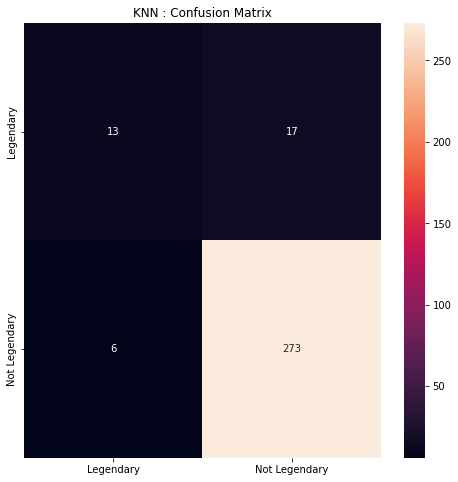


---------------------------------------------------------

Decision Tree : Trained!
Decision Tree : Accuracy
 Train : 98.3%
 Test : 97.1% 

Decision Tree Classification Report ------------->
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       279
           1       0.86      0.83      0.85        30

    accuracy                           0.97       309
   macro avg       0.92      0.91      0.92       309
weighted avg       0.97      0.97      0.97       309



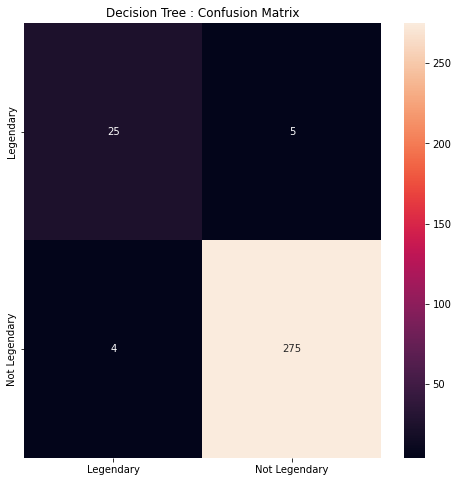


---------------------------------------------------------

Random Forest : Trained!
Random Forest : Accuracy
 Train : 100.0%
 Test : 97.7% 

Random Forest Classification Report ------------->
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       279
           1       1.00      0.77      0.87        30

    accuracy                           0.98       309
   macro avg       0.99      0.88      0.93       309
weighted avg       0.98      0.98      0.98       309



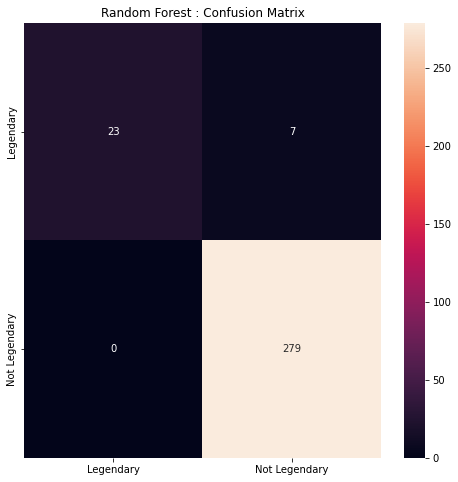


---------------------------------------------------------



In [100]:
for name, model in models.items():
  model.fit(x_train, y_train)
  print(f'{name} : Trained!')
  y_pred = model.predict(x_test)
  print(f'{name} : Accuracy\n Train : {round(model.score(x_train, y_train),3)*100}%\n Test : {round(model.score(x_test, y_test),3)*100}% \n')
  print(f'{name} Classification Report ------------->\n{classification_report(y_test, y_pred)}')
  cm = confusion_matrix(y_test, y_pred, labels = [1,0])
  cm_df = pd.DataFrame(cm, columns = [i for i in ['Legendary' , 'Not Legendary']], index = [i for i in ['Legendary' , 'Not Legendary']])
  plt.figure(figsize = (8,8))
  sns.heatmap(cm_df, annot = True, fmt = 'g')
  plt.title(f'{name} : Confusion Matrix')
  plt.show()
  print('\n---------------------------------------------------------\n')